# **Data Science e Análise de Dados**

By [Carlos Falcone](https://github.com/carlosfalcone)

# Preços de combustiveis no Brasil

Faremos aqui uma análise exploratória de dados com base na Série Histórica de Preços de Combustíveis (Gasolina, Etanol, Diesel e GNV) do primeiro semestre de 2004. Os dados foram obtidos através do site 'basedosdados.org'.

O objetivo desta análise é entender a variação de preços de cada tipo combustível ao longo do tempo, as relações de preço entre cada um, bem como a influencia da bandeira do posto nas suas precificações. Podemos também verificar o preço médio dos combustíveis de cada posto de combustível e entender se o preço tem alguma relação com a sua localização (bairro nobre, por exemplo). Ou seja, é possível se obter vários insights a partir de uma análise exploratória, que irá depender apenas do que se deseja investigar.

Antes de partirmos para a análise exploratória de dados, precisamos fazer primeiro a varredura e tratamento dos dados, comumente chamado de ETL (Extract/Extração, Transform/Transformaçao and Load/Carregamento). Portanto, iniciaremos com esta etapa e depois partiremos para a análise exploratória.

<img src=https://www.revendedor.com.br/wp-content/uploads/2018/09/como-abrir-posto-de-gasolina.jpg>

# Importação das bibliotecas do Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento dos dados

In [3]:
df_combustivel = pd.read_csv('/content/drive/MyDrive/CienciaDaComputacao/0_DIO/AnaliseDeDados/ca-2004-01.csv',sep=';', decimal=',',encoding='utf-8',on_bad_lines='skip')

# Verificação e transformação dos dados

Verificação da quantidade de linhas e colunas do dataset.

In [4]:
df_combustivel.shape

(281531, 16)

Tabela com 281.531 linhas e 16 colunas.

Seleção de 5 amostras aleatórias do dataset para visualização.

In [5]:
df_combustivel.sample(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
47678,NE,RN,NATAL,VIA POSTO DE COMBUSTÍVEIS LTDA,03.377.406/0001-86,AVENIDA MIGUEL CASTRO,797,ESQUINA COM RUA DOS POTIGUARES,LAGOA NOVA,59062-000,ETANOL,18/05/2004,1.240,1.0178,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
108911,CO,GO,PORANGATU,DELTA DERIVADOS DE PETROLEO LTDA,25.025.933/0001-64,AVENIDA FEDERAL ESQ. COM AV. BRASILIA,359,0,SETOR RODOVIÁRIO,76550-000,GASOLINA,31/05/2004,2.040,1.7400,R$ / litro,BRANCA
243891,SE,SP,FRANCA,POSTO CRUZEIRO DE FRANCA LTDA,48.445.779/0001-85,AVENIDA PRESIDENTE VARGAS,624,NaN,CIDADE NOVA,14401-120,GASOLINA,22/06/2004,2.089,1.8697,R$ / litro,RAIZEN
148708,NE,PE,GRAVATA,GRAVATA MERCANTIL DE COMBUSTIVEIS LTDA,04.558.203/0001-59,AVENIDA CICERO BATISTA DE OLIVEIRA,1375,,NOSSA SENHORA DAS GRAÇAS,55644-200,DIESEL,08/06/2004,1.330,1.2050,R$ / litro,BRANCA
165983,NE,MA,CAXIAS,POSTO GUIMARAES EIRELI,04.502.809/0001-72,AVENIDA NEREU BITTENCOURT,66,NaN,CENTRO,65608-180,ETANOL,07/06/2004,1.450,NaN,R$ / litro,IPIRANGA


Verificação da quantidade de dados faltantes em valor percentual. 

In [6]:
df_combustivel.isnull().sum()/len(df_combustivel['Bairro'])*100

Regiao - Sigla        0.000000
Estado - Sigla        0.000000
Municipio             0.000000
Revenda               0.000000
CNPJ da Revenda       0.000000
Nome da Rua           0.000000
Numero Rua            0.061450
Complemento          67.238777
Bairro                0.290554
Cep                   0.000000
Produto               0.000000
Data da Coleta        0.000000
Valor de Venda        0.000000
Valor de Compra      30.652397
Unidade de Medida     0.000000
Bandeira              0.000000
dtype: float64

Podemos observar que as colunas 'Complemento' e 'Valor de Compra' possuem 67% e 30% de dados faltantes. Portanto se alguma análise for realizado com essas colunas, é necessário ter cuidado. Nao irei aqui remover ou preencher nenhuma informação faltante, pois isso afetaria o tamanho do dataset e perderiamos informações importantes em outras colunas.

Análise do tipo de dado em cada coluna.

In [7]:
df_combustivel.dtypes

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

Esta informação é importante, pois alguns cálculos só são possíveis com determinados tipos de dados. Neste caso, precisaremos realizar uma conversão nos valores da coluna 'Data da Coleta', de object para datatime, para podermos realizar cálculos com valores de data.

In [8]:
df_combustivel['Data da Coleta'] = pd.to_datetime(df_combustivel['Data da Coleta'])

In [9]:
df_combustivel.dtypes

Regiao - Sigla               object
Estado - Sigla               object
Municipio                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Numero Rua                   object
Complemento                  object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Valor de Compra             float64
Unidade de Medida            object
Bandeira                     object
dtype: object

Confirmação da mudança do tipo de dado da coluna 'Data da Coleta'.

Vamos adicionar uma coluna chamada Mes, para podermos realizar um agrupamento durante a análise de dados, que será feito na próxima etapa. 

In [10]:
df_combustivel['Mes'] = df_combustivel['Data da Coleta'].dt.month

Exibindo novamente o dataset, agora com a última coluna Mes inserida.

In [11]:
df_combustivel.sample(5)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Mes
10229,SE,RJ,ARARUAMA,RIVIERA DEL SOL AUTO SERVICE LTDA,02.729.112/0001-03,RODOVIA AMARAL PEIXOTO,S/N,"KM 94,5",IGUABINHA,28970-000,ETANOL,2004-11-05,0.999,0.7461,R$ / litro,BRANCA,11
50169,S,SC,TUBARAO,AUTO POSTO GOLFINHO LTDA,95.781.233/0001-85,AVENIDA EXPEDICIONARIO JOSE PEDRO COELHO,970,NaN,CENTRO,88700-000,DIESEL,2004-05-18,1.490,1.2250,R$ / litro,RAIZEN,5
249604,CO,GO,GOIANIA,H. R. COMÉRCIO DE DERIVADOS DE PETRÓLEO LTDA.,33.559.113/0001-80,AVENIDA T-4 LT.01/02,123,QD. 120,S BUENO,74000-000,ETANOL,2004-06-28,1.030,NaN,R$ / litro,IPIRANGA,6
176078,N,AC,CRUZEIRO DO SUL,JAMES CASTRO CAMELI,02.257.256/0002-95,TRAVESSA LUIZ MEIRIM PEDREIRA,101,"1º ANDAR, SL 3 B",MIRITIZAL,69980-000,DIESEL,2004-06-14,1.650,1.4811,R$ / litro,BRANCA,6
150936,SE,RJ,BARRA DO PIRAI,POSTO CARBELE LTDA,28.578.763/0001-33,RUA CORONEL NOVAES,120,NaN,CENTRO,27120-030,DIESEL,2004-08-06,1.380,1.1845,R$ / litro,DINAMO,8


# Análise exploratória dos dados

Vamos iniciar pela verificação das informações contidas em algumas colunas.

In [12]:
df_combustivel['Regiao - Sigla'].unique()

array(['SE', 'CO', 'NE', 'S', 'N'], dtype=object)

A coluna de 'Regiao - sigla' possui a informação das 5 regiões do território brasileiro: Sudeste, Centro-Oeste, Nordeste, Sul e Norte

In [13]:
len(df_combustivel['Estado - Sigla'].unique())

27

In [14]:
df_combustivel['Estado - Sigla'].unique()

array(['SP', 'DF', 'BA', 'RJ', 'MG', 'RS', 'PR', 'AC', 'AL', 'AM', 'AP',
       'CE', 'ES', 'GO', 'TO', 'MA', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'SC', 'RN', 'RO', 'RR', 'SE'], dtype=object)

A coluna 'Estado - Sigla' possui 26 estados e o Distrito Federal.

In [15]:
len(df_combustivel['Municipio'].unique())

616

In [16]:
df_combustivel['Municipio'].unique()

array(['GUARULHOS', 'SOROCABA', 'BRASILIA', 'SALVADOR', 'NITEROI',
       'MACAE', 'SAO SEBASTIAO DO PARAISO', 'SANTA MARIA', 'PATO BRANCO',
       'CRUZEIRO DO SUL', 'RIO BRANCO', 'SENA MADUREIRA',
       'SENADOR GUIOMARD', 'TARAUACA', 'ARAPIRACA', 'DELMIRO GOUVEIA',
       'PALMEIRA DOS INDIOS', 'RIO LARGO', 'SANTANA DO IPANEMA',
       'ITACOATIARA', 'PARINTINS', 'SAO GABRIEL DA CACHOEIRA', 'MACAPA',
       'PORTO GRANDE', 'ALAGOINHAS', 'BARREIRAS', 'ILHEUS', 'IPIRA',
       'IRECE', 'JOAO DOURADO', 'ITABUNA', 'BUERAREMA', 'ITAMARAJU',
       'JACOBINA', 'JAGUAQUARA', 'JEQUIE', 'POCOES', 'PORTO SEGURO',
       'QUIJINGUE', 'VALENCA', 'BEBERIBE', 'CANINDE', 'CRATO',
       'JUAZEIRO DO NORTE', 'EUSEBIO', 'ICO', 'ITAPIPOCA',
       'LIMOEIRO DO NORTE', 'MARACANAU', 'MARCO', 'MILAGRES',
       'MORADA NOVA', 'PEDRA BRANCA', 'QUIXADA', 'SOBRAL', 'ARACRUZ',
       'BARRA DE SAO FRANCISCO', 'CASTELO', 'COLATINA', 'GUARAPARI',
       'LINHARES', 'MARATAIZES', 'NOVA VENECIA', 'SAO MATEUS',

A coluna 'Municipio' possui 616 municípios.

In [17]:
len(df_combustivel['Revenda'].unique())

14224

In [18]:
df_combustivel['Revenda'].unique()

array(['AUTO POSTO SAKAMOTO LTDA',
       'COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS DE PETROLEO LTDA',
       'GASOL COMBUSTÍVEIS AUTOMOTIVOS LTDA.', ..., 'A. P. PRIMOR LTDA',
       'POSTO DE SERVICOS BOM DESPACHO LTDA',
       'AUTO POSTO DEVAGAR MOTORISTA LTDA'], dtype=object)

A coluna 'Revenda' possui os nomes de 14.224 postos de combustível.

In [19]:
len(df_combustivel['Bairro'].unique())

5785

In [20]:
df_combustivel['Bairro'].unique()

array(['BONSUCESSO', 'JARDIM ZULMIRA', 'TAGUATINGA', ..., 'QUARÁ II',
       'SERRA DA SANTA', 'LAGO AZUL'], dtype=object)

Na coluna 'Bairro' estão presentes 5.785 bairros dentro do território brasileiro.

In [21]:
df_combustivel['Produto'].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL', 'GNV'], dtype=object)

Na coluna 'Produto' temos 4 tipos de combustíveis.

In [22]:
len(df_combustivel['Bandeira'].unique())

104

In [23]:
df_combustivel['Bandeira'].unique()

array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'EXXEL', 'LIQUIGÁS',
       'SABBÁ', 'DNP', 'EQUATORIAL', 'CBPI', 'RAIZEN', 'TEMAPE',
       'IPIRANGA', 'EURO COMBUSTÍVEIS', 'COSAN LUBRIFICANTES', 'SATELITE',
       'HORA', 'PETROBAHIA', 'TDC DISTRIBUIDORA', 'PETROSERRA', 'SOLL',
       'SP', 'SETTA DISTRIBUIDORA', 'ALESAT', 'T.A.', 'FRANNEL',
       'ALE COMBUSTÍVEIS', 'ASTER', 'REDE BRASIL', 'UBP PETRÓLEO',
       'LIDERPETRO', 'ZEMA', 'DINAMO', 'UBERLANDIA', 'RIO BRANCO',
       'PETROMIL', 'FORMULA', 'TAURUS', 'ROYAL FIC', 'SIMARELLI', 'JACAR',
       'PETRO AMAZON', 'PDV BRASIL', 'ELLO', 'DISLUB', 'FEDERAL', 'MAX',
       'ELLO-PUMA', 'CIAX', 'SAARA', 'FOX', 'CIAPETRO',
       'AGUIA DISTRIBUIDORA', 'BRASOIL', 'JATOBA', 'IDAZA', 'POTENCIAL',
       'PETROALCOOL', 'UNI', 'PETROPAR DISTRIBUIDORA', 'EQUADOR',
       'LATINA', 'CHARRUA', 'MEGAPETRO', 'AMERICANOIL', 'POLIPETRO',
       'DIBRAPE', 'REJAILE', 'WALENDOWSKY', 'RAIZEN MIME', 'DELTA',
       'SULPETRO', 'GLOBAL DISTRIBUIDOR

E finalmente, na coluna 'Bandeira', estão presentes 104 bandeiras (marcas) de combustível.

Agora faremos uma análise dos preços do combustíveis. Vamos fazer somente da Gasolina e Etanol para o estudo não ficar muito extenso.

In [24]:
df_comb_gasolina = df_combustivel.loc[df_combustivel['Produto'] == 'GASOLINA']
df_comb_gasolina.shape

(100031, 17)

In [25]:
df_comb_etanol = df_combustivel.loc[df_combustivel['Produto'] == 'ETANOL']
df_comb_etanol.shape

(92308, 17)

Valor médio, primeiro quartil, mediana, terceiro quartil e máximo, para a gasolina.

In [26]:
df_comb_gasolina['Valor de Venda'].describe()

count    100031.000000
mean          2.027925
std           0.151055
min           1.529000
25%           1.930000
50%           1.999000
75%           2.120000
max           2.890000
Name: Valor de Venda, dtype: float64

Abaixo a mesma informação da tabela acima, porém no formato de gráfico boxplot.

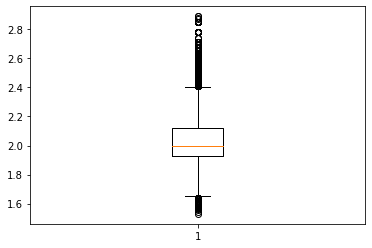

In [27]:
plt.boxplot(df_comb_gasolina['Valor de Venda']);

Valor médio, primeiro quartil, mediana, terceiro quartil e máximo, para o etanol.

In [28]:
df_comb_etanol['Valor de Venda'].describe()

count    92308.000000
mean         1.099878
std          0.249576
min          0.590000
25%          0.899000
50%          1.090000
75%          1.290000
max          2.400000
Name: Valor de Venda, dtype: float64

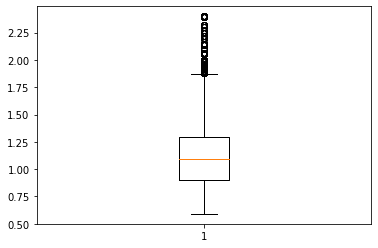

In [29]:
plt.boxplot(df_comb_etanol['Valor de Venda']);

Pode-se observar tanto para gasolina, quanto para o etanol, que existem muitos valores discrepantes (outliers). Vamos começar por estes outliers, verificando quais são exatamente os postos que estão vendendo gasolina com um preço muito acima ou muito abaixo do mercado.

In [30]:
Q1 = df_comb_gasolina['Valor de Venda'].describe()[4]
Q3 = df_comb_gasolina['Valor de Venda'].describe()[6]
IQR = Q3 - Q1
superior = Q3 + 1.5 * IQR
print(superior)
inferior = Q1 - 1.5 * IQR
print(inferior)

2.4050000000000002
1.6449999999999996


Postos com preço da gasolina muito acima do mercado.

In [31]:
df_comb_gasolina.loc[df_comb_gasolina['Valor de Venda']>superior]

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Mes
26,N,AC,CRUZEIRO DO SUL,E. D. SILVA & FILHO LTDA - ME,04.096.504/0001-08,MARGEM ESQUERDA DO RIO JURUA,S/N,FLUTUANTE,CENTRO,69980-000,GASOLINA,2004-10-05,2.41,1.8799,R$ / litro,BRANCA,10
38,N,AC,CRUZEIRO DO SUL,JAMES CASTRO CAMELI,02.257.256/0001-04,RUA REGO BARROS,360,NaN,Centro,69980-000,GASOLINA,2004-10-05,2.41,1.8754,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,10
41,N,AC,CRUZEIRO DO SUL,CIMACRE IMPORTAÇÃO E EXPORTAÇÃO LTDA,01.534.514/0002-70,MARGEM ESQUERDA DO RIO JURUÁ,S/N,FLUTUANTE,CENTRO,69980-000,GASOLINA,2004-10-05,2.41,NaN,R$ / litro,BRANCA,10
43,N,AC,CRUZEIRO DO SUL,CIMACRE IMPORTAÇÃO E EXPORTAÇÃO LTDA,01.534.514/0001-90,"AVENIDA BOULEVARD THAUMATURGO, 210",S/N,0,CENTRO,69980-000,GASOLINA,2004-10-05,2.41,NaN,R$ / litro,BRANCA,10
124,N,AC,SENA MADUREIRA,SENA COMERCIO DE DERIVADOS DE PETROLEO LTDA,63.609.002/0001-00,AVENIDA BRASIL,2154,NaN,TRIANGULO,69940-000,GASOLINA,2004-10-05,2.45,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276642,S,RS,SAO GABRIEL,COMERCIAL DE COMBUSTÍVEIS ALCAR LTDA.,94.023.645/0002-74,RUA ANDRADE NEVES,155,NaN,CENTRO,97300-000,GASOLINA,2004-06-28,2.42,1.9030,R$ / litro,COSAN LUBRIFICANTES,6
276647,S,RS,SAO GABRIEL,COMERCIAL DE COMBUSTIVEIS PORTO LTDA,89.318.539/0001-05,AVENIDA FRANCISCO HERMENEGILDO DA SILVA,1933,NaN,CENTRO,97300-000,GASOLINA,2004-06-29,2.43,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,6
276653,S,RS,SAO LUIZ GONZAGA,POSTO BR 444 COMBUSTIVEIS LTDA,00.255.690/0001-20,RODOVIA BR 285,S/N,KM 444,RODOVIA,97800-000,GASOLINA,2004-06-29,2.42,1.9126,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,6
276671,S,RS,SAO LUIZ GONZAGA,AUTO POSTO LIMOEIRO LTDA,88.857.685/0001-38,RUA SAO JOAO,2670,,MONSENHOR WOLSKI,97800-000,GASOLINA,2004-06-29,2.55,1.9668,R$ / litro,CBPI,6


1.484 postos de combustível no Brasil, vendem gasolina com preço acima do mercado. Obs: A tabela acima não exibe todas as 1.484 linhas para não ocupar muito espaço na tela.

Postos com preço da gasolina muito abaixo do mercado.

In [32]:
df_comb_gasolina.loc[df_comb_gasolina['Valor de Venda']<inferior]

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Mes
16415,SE,SP,DIADEMA,AUTO POSTO ELEFANTE BRANCO LTDA,02.761.490/0001-74,RUA ANTONIO SILVIO CUNHA BUENO,501,NaN,JARDIM INAMAR,09970-160,GASOLINA,2004-05-13,1.590,NaN,R$ / litro,ASTER,5
16420,SE,SP,DIADEMA,AUTO POSTO F-5 LTDA,67.762.476/0001-30,AVENIDA PIRAPORINHA,828,0,VILA NOGUEIRA,09950-000,GASOLINA,2004-12-05,1.599,NaN,R$ / litro,BRANCA,12
16432,SE,SP,DIADEMA,GOLFINHO II CENTRO AUTOMOTIVO LTDA,02.061.255/0001-90,RUA CASTRO ALVES,104,NaN,VILA DIADEMA,09911-430,GASOLINA,2004-05-13,1.619,1.50,R$ / litro,BRANCA,5
16440,SE,SP,DIADEMA,POSTO NAVEGANTES LTDA,59.167.270/0001-34,ESTRADA PEDREIRA ALVARENGA,2483,NaN,ELDORADO,09971-340,GASOLINA,2004-12-05,1.630,1.50,R$ / litro,BRANCA,12
16443,SE,SP,DIADEMA,AUTO POSTO DOM JOAO VI LTDA,66.900.325/0001-39,AVENIDA DOM JOAO VI,1390,0,JARDIM SANTA RITA,09940-400,GASOLINA,2004-12-05,1.630,1.60,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198293,SE,SP,SAO VICENTE,AUTO POSTO MONUMENTO LTDA,71.100.374/0001-27,PRACA CORONEL LOPES,264,0,CENTRO,11310-020,GASOLINA,2004-06-15,1.639,NaN,R$ / litro,BRANCA,6
198316,SE,SP,SAO VICENTE,AUTO POSTO E ESTACIONAMENTO ITAPURA DE SAO VIC...,54.755.962/0001-80,"AV. PADRE ANCHIETA, NR. 313",S/N,NaN,CENTRO,11300-000,GASOLINA,2004-06-15,1.640,1.52,R$ / litro,BRANCA,6
209412,SE,SP,JACAREI,LAILA ABRAHAO PEREIRA,02.815.205/0001-50,AVENIDA SANTA HELENA,97,NaN,JARDIM DIDINHA,12322-550,GASOLINA,2004-06-14,1.629,1.55,R$ / litro,BRANCA,6
209784,SE,SP,OSASCO,AUTO POSTO 127 LTDA,03.682.444/0001-42,AVENIDA DOS AUTONOMISTAS,6023,NaN,QUINTAUNA,06194-050,GASOLINA,2004-06-16,1.619,NaN,R$ / litro,BRANCA,6


461 postos no Brasil vendem gasolina com preço abaixo do mercado.

Vamos agora calcular essas quantidades em termos percentuais, apenas para a gasolina, como exemplo.

In [33]:
qtde_postos_gasolina = len(df_comb_gasolina['Revenda'].unique())
qtde_postos_gasolina

14132

In [34]:
qtde_superior = df_comb_gasolina.loc[df_comb_gasolina['Valor de Venda']>superior].shape[0]
qtde_superior

1484

In [35]:
postos_valor_gasolina_acima_mercado = qtde_superior/qtde_postos_gasolina*100
print(f'Percentual dos postos com preço da gasolina acima do mercado: {postos_valor_gasolina_acima_mercado:.2f} %')

Percentual dos postos com preço da gasolina acima do mercado: 10.50 %


In [36]:
qtde_inferior = df_comb_gasolina.loc[df_comb_gasolina['Valor de Venda']<inferior].shape[0]
qtde_inferior

461

In [37]:
postos_valor_gasolina_abaixo_mercado = qtde_inferior/qtde_postos_gasolina*100
print(f'Percentual dos postos com preço da gasolina abaixo do mercado: {postos_valor_gasolina_abaixo_mercado:.2f} %')

Percentual dos postos com preço da gasolina abaixo do mercado: 3.26 %


Seguindo com as análises, vamos investigar o preço médio da gasolina em cada estado.

In [38]:
df_comb_gasolina.groupby(df_comb_gasolina['Estado - Sigla'])['Valor de Venda'].mean().sort_values(ascending=False)

Estado - Sigla
MT    2.377592
AC    2.377569
RO    2.318653
PA    2.280301
AP    2.207699
RS    2.171760
CE    2.162119
AL    2.145592
MS    2.132728
PI    2.121217
SC    2.112033
TO    2.092760
BA    2.073925
DF    2.052200
AM    2.048095
PB    2.044610
ES    2.037866
RJ    2.034444
PE    2.030039
MA    2.028170
RN    2.021984
GO    2.017948
MG    2.007181
PR    2.006665
RR    1.997579
SE    1.985053
SP    1.927131
Name: Valor de Venda, dtype: float64

Podemos observar rapidamente através dos resultados, que o estado do Mato Grosso possui a gasolina mais cara e o estado de São Paulo o valor mais barato.

Vamos fazer a mesma coisa agora para o etanol.

In [39]:
df_comb_etanol.groupby(df_comb_etanol['Estado - Sigla'])['Valor de Venda'].mean().sort_values(ascending=False)

Estado - Sigla
AP    1.843220
PA    1.791950
AC    1.670669
PI    1.580332
MA    1.575748
RO    1.497400
RR    1.444359
BA    1.388782
AM    1.368265
MT    1.359598
DF    1.352673
CE    1.341139
PB    1.316267
SE    1.294446
MS    1.288298
RS    1.279174
SC    1.272304
RN    1.267090
TO    1.241634
PE    1.220689
MG    1.219049
AL    1.188042
RJ    1.125348
ES    1.123446
GO    1.119176
PR    1.002126
SP    0.850398
Name: Valor de Venda, dtype: float64

Já no caso do etanol, o estado do Amapá aparece com o preço médio mais alto, porém o estado de São Paulo continua com o valor mais baixo.

E se quisermos saber por exemplo a variação de preço da gasolina por mês, considerando todo o território brasileiro?

In [40]:
df_comb_gasolina.groupby(df_comb_gasolina['Mes'])['Valor de Venda'].mean()

Mes
1     2.001429
2     1.982800
3     2.020652
5     1.982310
6     2.093274
7     2.014484
8     2.006343
9     1.982234
10    1.994102
11    1.968009
12    1.984128
Name: Valor de Venda, dtype: float64

Os valores dispostos no grafico abaixo deixa a visualizaçao mais fácil.

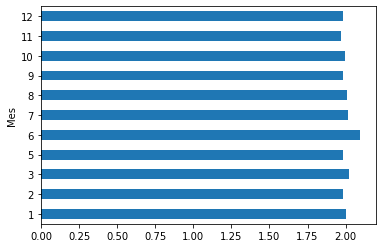

In [50]:
df_comb_gasolina.groupby(df_comb_gasolina['Mes'])['Valor de Venda'].mean().plot.barh();

Considerando agora o municipio de Belo Horizonte, cidade onde eu resido, iremos verificar a variação de preço da gasolina por bairro para entender se os preços mais altos estão concentrados em bairros mais nobres da cidade.

In [42]:
df_belo_horizonte = df_comb_gasolina.loc[df_comb_gasolina['Municipio'] == 'BELO HORIZONTE']
# df_belo_horizonte.sample(5)

In [43]:
df_belo_horizonte.groupby(df_belo_horizonte['Bairro'])['Valor de Venda'].mean().sort_values(ascending=False).head(15)

Bairro
BOA VISTA              2.063500
SAO PEDRO              1.977000
SANTO ANTONIO          1.976750
LETÍCIA                1.962750
SÃO FRANCISCO          1.962250
VILA IPIRANGA          1.962250
BELVEDERE              1.959000
OLHOS D'AGUA           1.957500
SAO BERNARDO           1.953250
SANTA LÚCIA            1.951062
FLORAMAR               1.950250
SION                   1.947600
MANGABEIRAS            1.947000
SAO JOSE (PAMPULHA)    1.946500
OURO PRETO             1.946500
Name: Valor de Venda, dtype: float64

Aqui no top 15 dos bairros com gasolina mais cara, observo alguns bairros nobres e outros mais populares, demonstrando assim que os preços altos não são exclusividade dos bairros nobres.

In [44]:
df_belo_horizonte.groupby(df_belo_horizonte['Bairro'])['Valor de Venda'].mean().sort_values(ascending=False).tail(15)

Bairro
GOIANIA                1.835000
NOVA GRANADA           1.835000
SAO VICENTE            1.834250
BARRACA                1.833500
PROVIDÊNCIA            1.833250
NOVA SUIÇA             1.832500
GLORIA                 1.831250
PIRATININGA            1.830000
CALAFATE               1.828667
SANTA CRUZ             1.826750
BARRO PRETO            1.823250
GLALIJA                1.819000
ITATIAIA               1.817500
SAO LUIZ (PAMPULHA)    1.810000
JARDIM AMERICA         1.799000
Name: Valor de Venda, dtype: float64

Já na lista dos 15 bairros com preço mais baixo da gasolina, um menor numero de bairros nobres estão presentes.





# Conclusão:
Fizemos várias análises e descobrimos várias informações implícitas no banco de dados. Poderíamos fazer mais análises, complexas ou não, dependendo do que se queira investigar. As relações de preço entre os combustíveis por exemplo é um pouco mais trabalhosa, e por isso deixaremos esta parte para um próximo capítulo.

Ou seja, a análise exploratória possui infinitas possibilidades, só precisamos ter de forma clara quais perguntas queremos responder. 